In [1]:
from google.colab import drive

ModuleNotFoundError: No module named 'google.colab'

In [115]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#Changing directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Waste/')

In [117]:
!ls

ecomodel.h5  model.h5  tests  train  Untitled.ipynb


In [0]:
from IPython.display import Image  #Library for displaying images

In [0]:
#Display sample train images

In [120]:
Image('train/Plastic_bottle/btt21.jpg')

In [121]:
Image('train/Sachet/s18.jpg')

In [122]:
Image('train/Paper/ptt10.jpg')

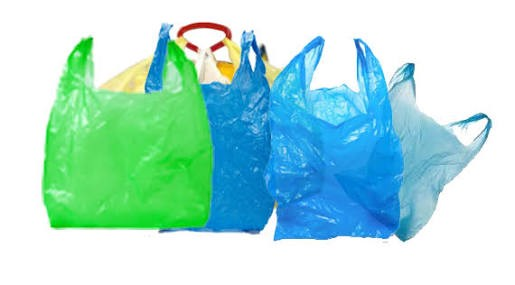

In [123]:
Image('train/polythene/po6.jpg')

In [0]:
# Importing models

In [0]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [0]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'),    
    MaxPooling2D(pool_size=(2,2)),     
    Conv2D(32, (3,3), activation='relu'), 
    MaxPooling2D(pool_size=(2,2)), 
    Flatten(),       
    Dense(128, activation='relu'),    
    Dense(4, activation='softmax')   
])

In [0]:
#Compiling

In [0]:
model.compile(optimizer='adam',    #optimizer changes the weight and bias and recalculates per each iteration
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [130]:
train_data = ImageDataGenerator(
                                rescale=1./255,
                                shear_range=0.2,  
                                zoom_range=0.2,
                                horizontal_flip=True    
                               )    

test_data = ImageDataGenerator(rescale=1./255)    

train_data = train_data.flow_from_directory('train', target_size=(64,64), batch_size=32, class_mode='binary')  

test_data = test_data.flow_from_directory('tests', target_size=(64,64), batch_size=32, class_mode='binary')

Found 96 images belonging to 4 classes.
Found 48 images belonging to 4 classes.


In [0]:
#Training the model

In [134]:
model.fit_generator(train_data, epochs=40)

Epoch 1/40
3/3 [==============================] - 1s 402ms/step - loss: 0.1431 - acc: 0.9792
Epoch 2/40
3/3 [==============================] - 1s 420ms/step - loss: 0.2585 - acc: 0.9062
Epoch 3/40
3/3 [==============================] - 1s 384ms/step - loss: 0.3553 - acc: 0.8438
Epoch 4/40
3/3 [==============================] - 1s 368ms/step - loss: 0.2065 - acc: 0.9375
Epoch 5/40
3/3 [==============================] - 1s 397ms/step - loss: 0.3460 - acc: 0.9062
Epoch 6/40
3/3 [==============================] - 1s 396ms/step - loss: 0.3710 - acc: 0.8542
Epoch 7/40
3/3 [==============================] - 1s 410ms/step - loss: 0.2236 - acc: 0.9479
Epoch 8/40
3/3 [==============================] - 1s 356ms/step - loss: 0.2361 - acc: 0.9271
Epoch 9/40
3/3 [==============================] - 1s 396ms/step - loss: 0.2173 - acc: 0.9167
Epoch 10/40
3/3 [==============================] - 1s 388ms/step - loss: 0.2002 - acc: 0.9271
Epoch 11/40
3/3 [==============================] - 1s 395ms/step - lo

In [0]:
# Prediction

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
test_image = image.load_img('tests/plastic_bottle/btt12.jpg', target_size=(64,64))  
test_image = image.img_to_array(test_image)   

import numpy as np
test_image = np.expand_dims(test_image, axis=0)

In [0]:
prediction = model.predict(test_image)[0]

In [138]:
print(prediction)

[0. 1. 0. 0.]


In [143]:
if prediction[0] == 1.0:   
  print('paper')
elif prediction[1] == 1.0:
  print('plastic_bottle')
elif prediction[2] == 1.0: 
  print('polythene')
else:
  print('sachet')

plastic_bottle


In [0]:
model.save('ecomodel.h5')

In [0]:
#Computer Vision

In [0]:
import cv2

In [0]:
from tensorflow.keras.models import load_model

In [0]:
import numpy as np

In [0]:
from keras.preprocessing import image

In [0]:
model = load_model('ecomodel.h5')

In [0]:
cap = cv2.VideoCapture(0)

In [153]:
while True:
    check, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if np.argmax(result, axis=1) == 0:
            cv2.putText(frame, 'paper', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, cv2.LINE_AA)
    elif np.argmax(result, axis=1) == 1:
            cv2.putText(frame, 'plastic_bottle', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, cv2.LINE_AA) 
    elif np.argmax(result, axis=1) == 2:
            cv2.putText(frame, 'polythene', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, cv2.LINE_AA)      
    else:
         cv2.putText(frame, 'sachet', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, cv2.LINE_AA)
           

         cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        
cv2.imshow('frame',frame)
if cv2.waitKey(20) & 0xFF == ord('q'):
        break        

error: ignored